In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
# import the KMeans clustering model from scikit-learn
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.base.datetools import dates_from_str
import warnings
%matplotlib inline

# New Section

In [ ]:
df = pd.read_csv('https://mda-project-poland.s3.eu-west-3.amazonaws.com/ultimate+aquastat+(flat).csv')  # will be used for Time series analysis
df_GDP = pd.read_csv('https://mda-project-poland.s3.eu-west-3.amazonaws.com/GDP.csv')
df_2018 = df.loc[df['Year'] == 2018]  # will be used for classification

In [ ]:
table_2018 = pd.pivot_table(data=df_2018,values='Value',index='Area',columns='Variable Name')

# drop undernourishment and add GDP  
table_2018 = table_2018.drop('Prevalence of undernourishment (3-year average)', axis=1)  # TODO download correct data from AQUASTAT instead of dropping here
df_GDP_2018 = df_GDP.loc[df_GDP['Year'] == 2018] 
table_GDP_2018 = pd.pivot_table(data=df_GDP_2018,values='Value',index='Area',columns='Variable Name')

table_2018 = table_2018.merge(table_GDP_2018, how='inner', on='Area')

table_2018.head() 

Variable Name,Agricultural water withdrawal as % of total renewable water resources,"Agriculture, value added (% GDP)",Average Temperature,Environmental Flow Requirements,GDP per capita,"Industry, value added to GDP",Long-term average annual precipitation in volume,MDG 7.5. Freshwater withdrawal as % of total renewable water resources,National Rainfall Index (NRI),Population density,SDG 6.4.1. Industrial Water Use Efficiency,SDG 6.4.1. Irrigated Agriculture Water Use Efficiency,SDG 6.4.1. Services Water Use Efficiency,SDG 6.4.1. Water Use Efficiency,SDG 6.4.2. Water Stress,"Services, value added to GDP",Total population with access to safe drinking-water (JMP),Total renewable water resources per capita,Total water withdrawal per capita,Gross Domestic Product (GDP)
Area,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.613807,22.440899,14.55,28.29,563.983834,4.800000e+09,213.48522,31.045461,185.0,56.937048,31.220059,0.102132,57.683901,0.935917,54.757019,1.060000e+10,55.3,1757.509385,548.072294,1.798697e+10
Argentina,3.187483,6.097129,14.99,515.80,11601.890080,1.070000e+11,1643.21640,4.301333,1062.0,15.954953,32.596217,0.152694,62.519941,13.244872,10.456664,3.010000e+11,99.1,19752.418500,851.646091,5.198717e+11
Australia,2.444073,2.121597,22.58,243.30,58689.490190,3.020000e+11,4133.81148,2.354494,717.1,3.216309,91.638244,0.418891,405.626370,70.079929,4.657865,1.010000e+12,100.0,19760.502710,697.308780,1.458953e+12
Azerbaijan,32.406633,5.212381,14.16,12.03,4729.900727,2.400000e+10,38.71020,35.088681,459.7,114.890727,50.317916,0.159418,46.604281,3.870952,53.729300,1.680000e+10,87.0,3485.086793,1222.870974,4.711248e+10
Bolivia (Plurinational State of),0.334495,11.481924,20.80,396.60,3592.084429,9.720000e+09,1258.97268,0.363763,1503.0,10.334379,281.746033,0.248811,140.699591,13.711080,1.177001,2.060000e+10,90.0,50558.691150,183.913845,4.028765e+10


In [ ]:
table=pd.pivot_table(data=df,values='Value',index=['Area','Year'],columns='Variable Name') #DEFAULT

# drop undernourishment and add GDP  
table = table.drop('Prevalence of undernourishment (3-year average)', axis=1)  # TODO download correct data from AQUASTAT instead of dropping here
table_GDP = pd.pivot_table(data=df_GDP,values='Value',index=['Area','Year'],columns='Variable Name')
table
table = table.merge(table_GDP, how='inner', on=['Area','Year'])
table.head(21)

Variable Name       Agricultural water withdrawal as % of total renewable water resources  \
Area        Year                                                                            
Afghanistan 1992.0                                          35.498101                       
            1997.0                                          31.427856                       
            2002.0                                          30.613807                       
            2007.0                                          30.613807                       
            2012.0                                          30.613807                       
            2017.0                                          30.613807                       
            2018.0                                          30.613807                       
Argentina   1992.0                                                NaN                       
            1997.0                                           2.455948                       
            2002.0                                           2.588954                       
            2007.0                                           2.921470                       
            2012.0                                           3.187483                       
            2017.0                                           3.187483                       
            2018.0                                           3.187483                       
Australia   1992.0                                                NaN                       
            1997.0                                           3.131301                       
            2002.0                                           2.913110                       
            2007.0                                           1.987195                       
            2012.0                                           1.948577                       
            2017.0                                           2.250000                       
            2018.0                                           2.444073                       

Variable Name       Agriculture, value added (% GDP)  Average Temperature  \
Area        Year                                                            
Afghanistan 1992.0                         54.207106                12.61   
            1997.0                         62.416768                12.86   
            2002.0                         45.134344                13.91   
            2007.0                         35.265942                13.80   
            2012.0                         28.556142                13.25   
            2017.0                         25.574670                13.12   
            2018.0                         22.440899                14.55   
Argentina   1992.0                          5.193747                14.37   
            1997.0                          4.527197                15.14   
            2002.0                          8.848660                14.60   
            2007.0                          7.452354                14.20   
            2012.0                          5.781744                15.20   
            2017.0                          5.478382                15.30   
            2018.0                          6.097129                14.99   
Australia   1992.0                          3.263718                21.75   
            1997.0                          3.038954                21.82   
            2002.0                          2.888534                22.25   
            2007.0                          2.338630                22.08   
            2012.0                          2.278906                21.83   
            2017.0                          2.458346                22.57   
            2018.0                          2.121597                22.58   

Variable Name       Environmental Flow Requirements  GDP per capita  \
Area        Year 

## Data cleaning

The only missing value in the 2018 dataset is the National Rainfall Index (NRI) in North Korea.

In [ ]:
table_2018_preprocessed = table_2018.fillna(table_2018.mean())
# TODO maybe replace with some manually calculated value (using other sources of data) instead of mean

The complete timetable has missing values for the oldest observations. By looking at the data, one notices a certain trend over the years for each variable and each country. This idea is used to fill the missing values. 

Using interpolation to fill the data gaps would be ideal. Since our dataset consists of MultiIndexes, a linear interpolation is the only possible option. However, linear interpolation is not useful in this situation, since the missing values occur only in the oldest observation. Those values are unfortunately not linearly interpolated, simply because there is no value to base the 'inter'polation on.

Hence, 'bfill' is used to fill the data gaps. A possible improvement here would be to create a dataframe using a single index (e.g. a dataframe per country and 'Year' as index) and to perform a spline interpolation, which can extrapolate NaNs at the tail of a Series/Dataframe.

In [ ]:
# # Could be done like this if dataframe has no MultiIndexes
# rev_table = table.iloc[::-1]
# rev_table_preprocessed = rev_table.interpolate(method='spline', order=2, axis=0)
# table = rev_table_preprocessed.iloc[::-1]

table_preprocessed = table.fillna(method='bfill')
table_preprocessed.head(21)

Variable Name       Agricultural water withdrawal as % of total renewable water resources  \
Area        Year                                                                            
Afghanistan 1992.0                                          35.498101                       
            1997.0                                          31.427856                       
            2002.0                                          30.613807                       
            2007.0                                          30.613807                       
            2012.0                                          30.613807                       
            2017.0                                          30.613807                       
            2018.0                                          30.613807                       
Argentina   1992.0                                           2.455948                       
            1997.0                                           2.455948                       
            2002.0                                           2.588954                       
            2007.0                                           2.921470                       
            2012.0                                           3.187483                       
            2017.0                                           3.187483                       
            2018.0                                           3.187483                       
Australia   1992.0                                           3.131301                       
            1997.0                                           3.131301                       
            2002.0                                           2.913110                       
            2007.0                                           1.987195                       
            2012.0                                           1.948577                       
            2017.0                                           2.250000                       
            2018.0                                           2.444073                       

Variable Name       Agriculture, value added (% GDP)  Average Temperature  \
Area        Year                                                            
Afghanistan 1992.0                         54.207106                12.61   
            1997.0                         62.416768                12.86   
            2002.0                         45.134344                13.91   
            2007.0                         35.265942                13.80   
            2012.0                         28.556142                13.25   
            2017.0                         25.574670                13.12   
            2018.0                         22.440899                14.55   
Argentina   1992.0                          5.193747                14.37   
            1997.0                          4.527197                15.14   
            2002.0                          8.848660                14.60   
            2007.0                          7.452354                14.20   
            2012.0                          5.781744                15.20   
            2017.0                          5.478382                15.30   
            2018.0                          6.097129                14.99   
Australia   1992.0                          3.263718                21.75   
            1997.0                          3.038954                21.82   
            2002.0                          2.888534                22.25   
            2007.0                          2.338630                22.08   
            2012.0                          2.278906                21.83   
            2017.0                          2.458346                22.57   
            2018.0                          2.121597                22.58   

Variable Name       Environmental Flow Requirements  GDP per capita  \
Area        Year 

## Selecting countries and doing VAR

In [ ]:
pd.IndexSlice[country,:]
# country = 'United States'
t=table_preprocessed.loc[pd.IndexSlice[country,:], :]
t

NameError: ignored

## VAR

select some features

**TODO:TODO:TODO:SOME VARIABLES ARE NOT VARIABLES AT ALL: THEY ARE CONSTANT → THEY SHOULD BE REMOVED**

In [ ]:
# selected features
ts=t[[#'Agricultural water withdrawal as % of total renewable water resources',
       #'Agriculture, value added (% GDP)', 
       'Average Temperature',
       'GDP per capita', #'Long-term average annual precipitation in volume',
       'National Rainfall Index (NRI)', 
        # 'Population density',
       #'Gross Domestic Product (GDP)', 'Industry, value added to GDP',
       #'Services, value added to GDP',
       'SDG 6.4.2. Water Stress']]
ts=ts.reset_index().drop(['Area'],axis=1)
ts=ts.set_index('Year')
# ts=pd.DataFrame(ts)
#ts=ts.drop('Long-term average annual precipitation in volume',axis=1)

Drop 2018, because the 5-year time interval should be consistent. We predict from 2017 onwards, in 5 year intervals.

In [ ]:
# ts.drop([2018],inplace=True)

In [ ]:
ts=pd.read_csv('/content/china.csv')
ts.set_index('Year',inplace=True)
ts.drop(columns=['Temperature (annual mean)','Population density (people per sq. km of land area)'],inplace=True)

### Plot the time series:

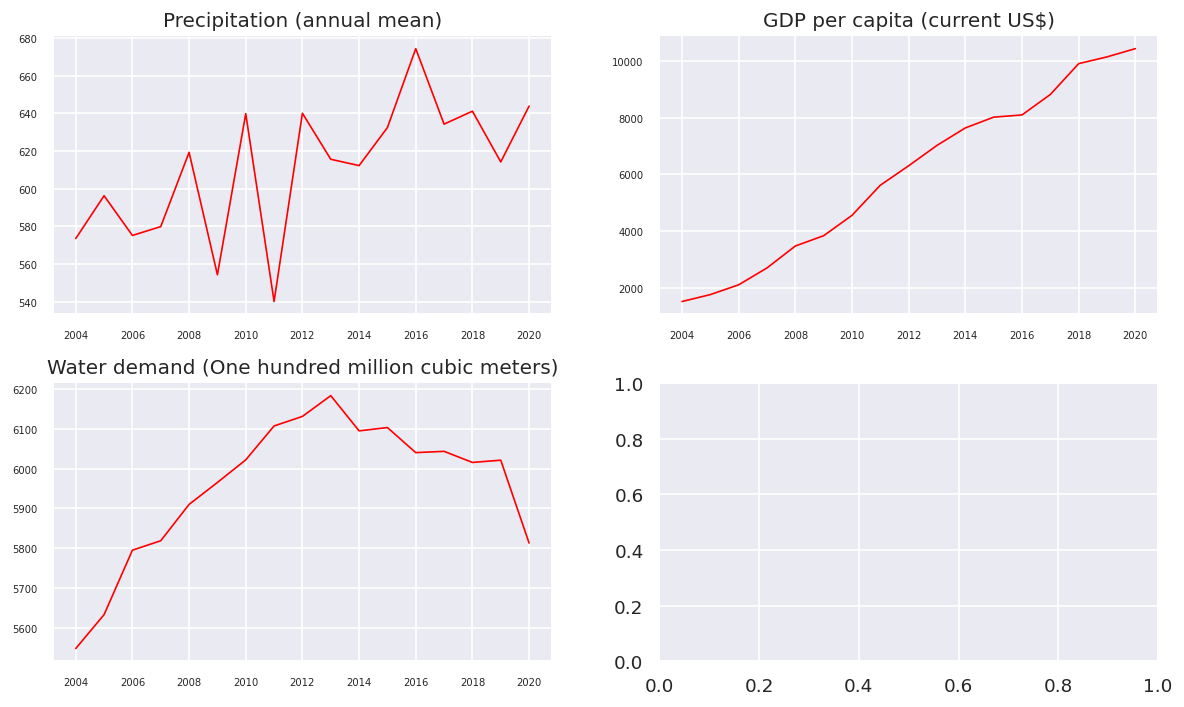

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i == 3:
      break
    data = ts[ts.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(ts.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Doing granger causality and drawing its heatmap

,Precipitation (annual mean)_x,GDP per capita (current US$)_x,Water demand (One hundred million cubic meters)_x
Precipitation (annual mean)_y,1.0000,0.0000,0.0209
GDP per capita (current US$)_y,0.6498,1.0000,0.0453
Water demand (One hundred million cubic meters)_y,0.8933,0.0017,1.0000


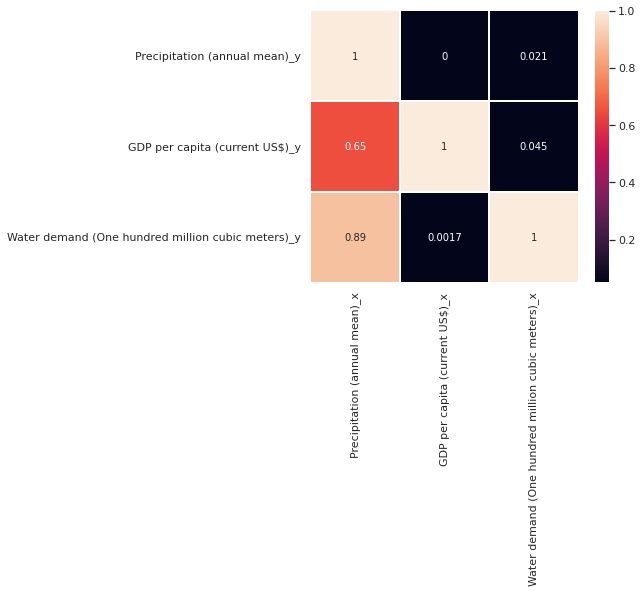

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=1
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
granger_result=grangers_causation_matrix(ts, variables = ts.columns)
plt.figure(figsize=(6,5))
sns.heatmap(granger_result,annot=True, linewidths=.5, vmin=.05)
granger_result

colorful cells in the heatmap are not significant

### Cointegration test


In [ ]:
# ts=ts.drop(columns=['Gross Domestic Product (GDP)','Services, value added to GDP','Industry, value added to GDP','Agriculture, value added (% GDP)'],axis=1)
# ts

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# def cointegration_test(df, alpha=0.05): 
#     """Perform Johanson's Cointegration Test and Report Summary"""
#     out = coint_johansen(df,-1,5)
#     d = {'0.90':0, '0.95':1, '0.99':2}
#     traces = out.lr1
#     cvts = out.cvt[:, d[str(1-alpha)]]
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Summary
#     print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
#     for col, trace, cvt in zip(df.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# cointegration_test(ts)
def adjust(val, length= 6): return str(val).ljust(length)

## Stationarity test

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

# ADF Test on each column
for name, column in ts.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Precipitation (annual mean)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3299
 No. Lags Chosen       = 1
 Critical value 1%     = -3.964
 Critical value 5%     = -3.085
 Critical value 10%    = -2.682
 => P-Value = 0.6154. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP per capita (current US$)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6504
 No. Lags Chosen       = 2
 Critical value 1%     = -4.012
 Critical value 5%     = -3.104
 Critical value 10%    = -2.691
 => P-Value = 0.8592. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Water demand (One hundred million cubic meters

some non-stationary -> difference once

In [ ]:
# 1st difference
tsdiff = ts.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in tsdiff.iteritems():
     adfuller_test(column, name=column.name)
     print('\n')

    Augmented Dickey-Fuller Test on "Precipitation (annual mean)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1597
 No. Lags Chosen       = 6
 Critical value 1%     = -4.473
 Critical value 5%     = -3.29
 Critical value 10%    = -2.772
 => P-Value = 0.2212. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP per capita (current US$)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.9672
 No. Lags Chosen       = 1
 Critical value 1%     = -4.012
 Critical value 5%     = -3.104
 Critical value 10%    = -2.691
 => P-Value = 0.0016. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Water demand (One hundred million cubic meters)" 
    ---------------

IndexError: ignored

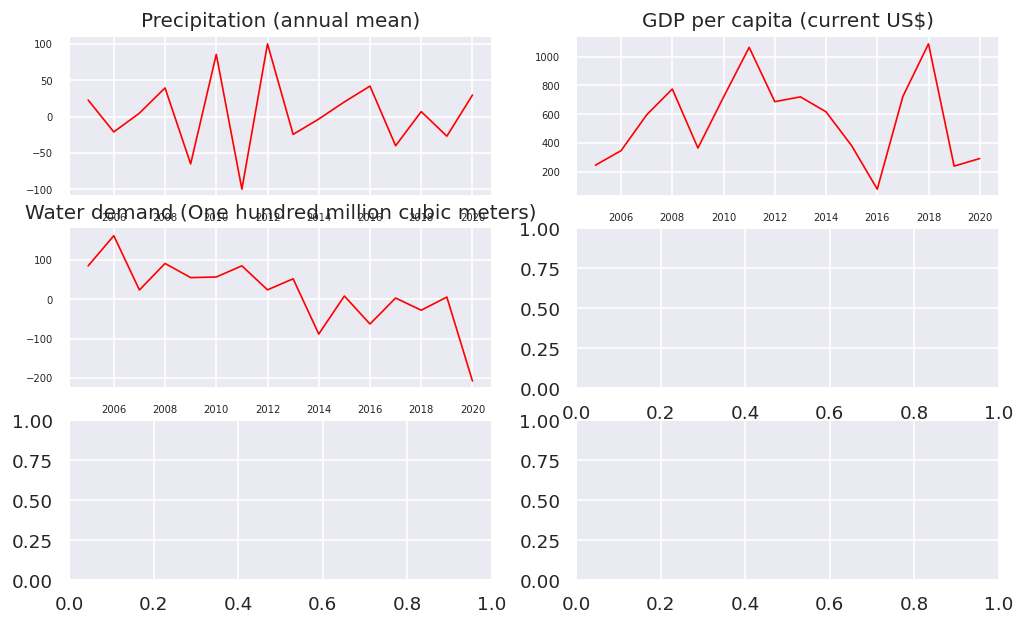

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i == 3:
      break
    data = tsdiff[ts.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(tsdiff.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
# 2nd difference
tsdiff2 = tsdiff.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in tsdiff2.iteritems():
     adfuller_test(column, name=column.name)
     print('\n')

    Augmented Dickey-Fuller Test on "Precipitation (annual mean)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.3673
 No. Lags Chosen       = 2
 Critical value 1%     = -4.138
 Critical value 5%     = -3.155
 Critical value 10%    = -2.714
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP per capita (current US$)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4446
 No. Lags Chosen       = 1
 Critical value 1%     = -4.069
 Critical value 5%     = -3.127
 Critical value 10%    = -2.702
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Water demand (One hundred million cubic meters)" 
    ---------------------------------------

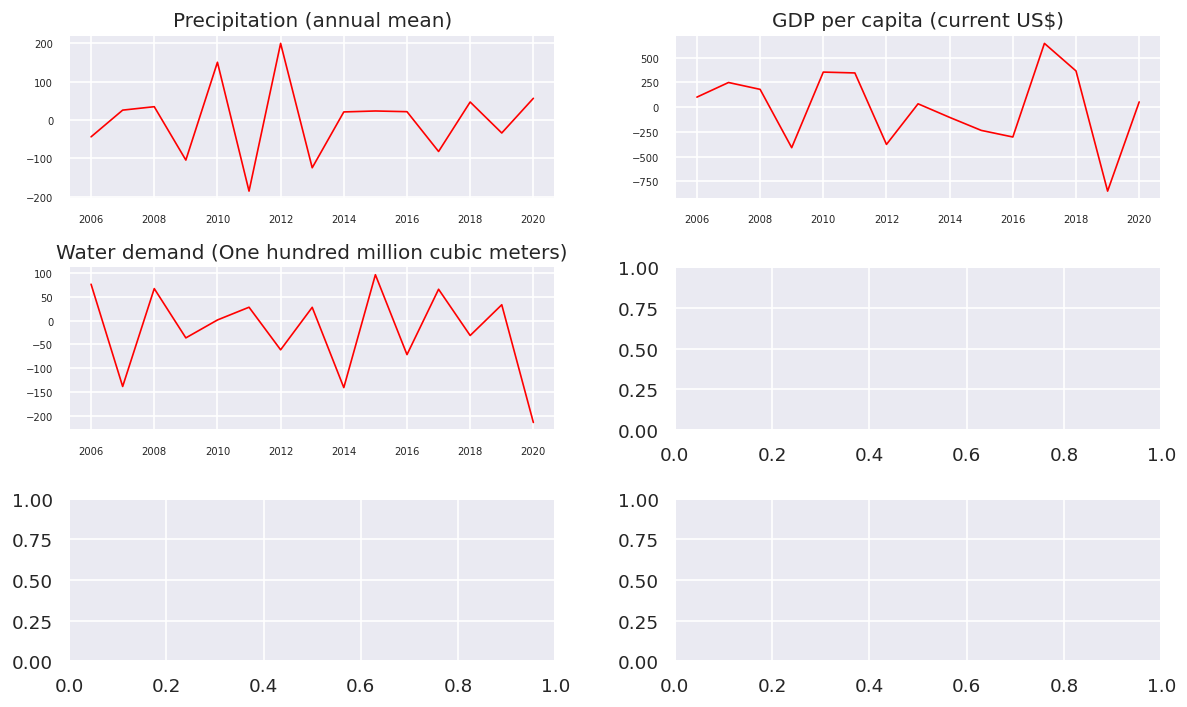

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i == 3:
      break
    data = tsdiff2[ts.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(tsdiff2.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

the timeseries are short -> no need to select optimal lag

In [ ]:
model = VAR(tsdiff2)
fit = model.fit()
fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Jun, 2022
Time:                     17:01:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    29.0954
Nobs:                     14.0000    HQIC:                   28.4970
Log likelihood:          -247.429    FPE:                2.62666e+12
AIC:                      28.5477    Det(Omega_mle):     1.23587e+12
--------------------------------------------------------------------
Results for equation Precipitation (annual mean)
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -1.142956        14.261249           -0.080           0.936
L1.Preci

autocorrelation plots do not exceed the cutoffs

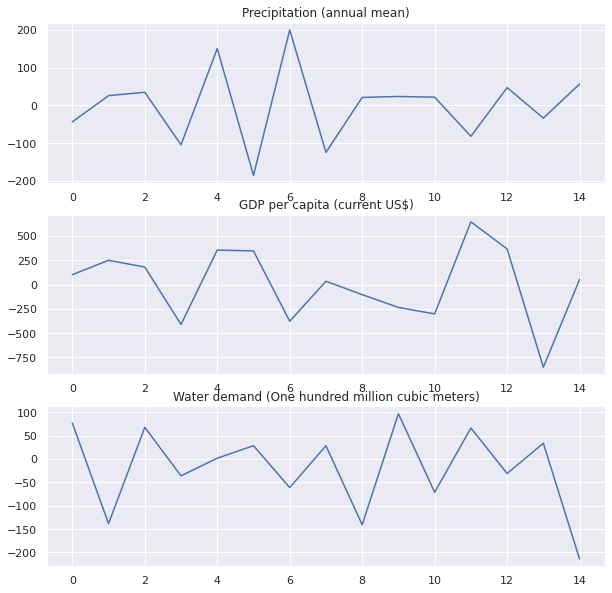

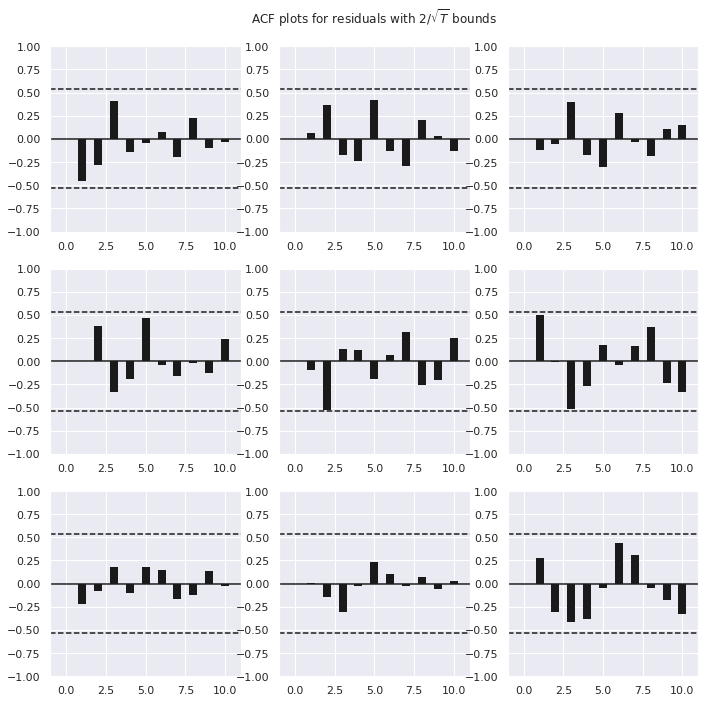

In [ ]:
fit.plot();
fit.plot_acorr();

## serial correlation check

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fit.resid)
def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(tsdiff.columns, out):
    print(adjust(col), ':', round(val, 2))

Precipitation (annual mean) : 2.9
GDP per capita (current US$) : 2.14
Water demand (One hundred million cubic meters) : 1.18


Predictions are made below. These are *diff* plots. Real values should be obtained by calculating the `cumsum` and adding them to the inital value.

1


,Precipitation (annual mean)_diff,GDP per capita (current US$)_diff,Water demand (One hundred million cubic meters)_diff
2021.0,-2.804957,105.461213,167.438809
2022.0,-44.060967,-127.038050,-161.051166
2023.0,85.001611,116.702420,81.253254
2024.0,-105.489148,-87.118123,-65.575264
2025.0,117.481712,59.142060,-10.573804
2026.0,-111.039884,-25.332694,14.166833
2027.0,100.587016,0.813386,-72.924216
2028.0,-77.513566,24.472395,56.547441
2029.0,56.718030,-37.354922,-95.139101
2030.0,-29.372969,49.616817,60.333329


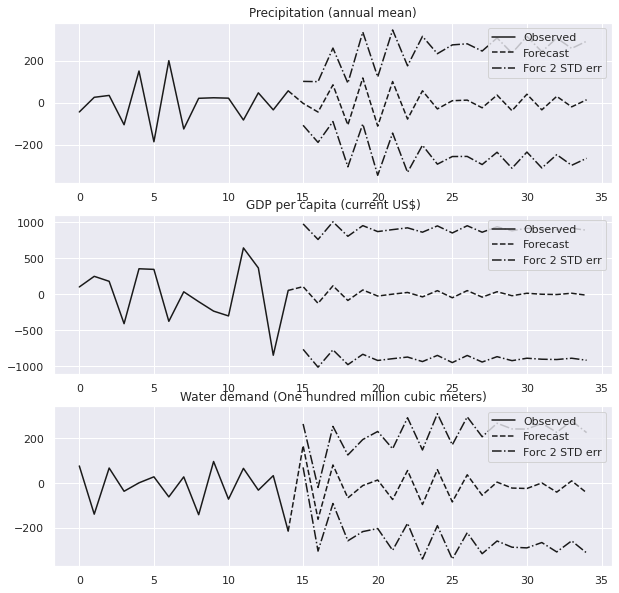

In [ ]:
# Get the lag order
lag_order = fit.k_ar
print(lag_order)

steps=20
idxf=tsdiff2.index.values[-lag_order:][0]

# Forecast
fc = fit.forecast(y=tsdiff2.values[-lag_order:], steps=steps)
# t_forecast=pd.DataFrame(fc, index=np.linspace(start=idxf+5,stop=idxf+steps*5,num=steps).tolist(), columns=ts.columns + '_diff')
t_forecast=pd.DataFrame(fc, index=np.linspace(start=idxf+1,stop=idxf+steps*1,num=steps).tolist(), columns=ts.columns + '_diff')


fit.plot_forecast(steps);
t_forecast

## Invert differencing

In [ ]:
def invert_transformation(df, df_forecast, second_diff=True):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_diff'] = (df[col].iloc[-1]-df[col].iloc[-2]) + df_fc[str(col)+'_2diff'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)] = df[col].iloc[-1] + df_fc[str(col)+'_diff'].cumsum()
    return df_fc

tf = invert_transformation(ts, t_forecast, second_diff=False) 
tf=tf.loc[:, (~(tf.columns.str.contains('_diff')))] # only keep forecast columns
tf

tfinal=pd.concat([ts,tf])
tfinal

,Precipitation (annual mean),GDP per capita (current US$),Water demand (One hundred million cubic meters)
2004.0,573.500000,1508.668098,5547.800000
2005.0,596.210000,1753.417829,5633.000000
2006.0,575.130000,2099.229435,5795.000000
2007.0,579.830000,2693.970063,5818.700000
2008.0,619.240000,3468.304602,5910.000000
2009.0,554.260000,3832.236432,5965.200000
2010.0,639.780000,4550.453108,6022.000000
2011.0,540.060000,5614.352135,6107.200000
2012.0,640.010000,6300.615118,6131.200000
2013.0,615.570000,7020.338485,6183.400000


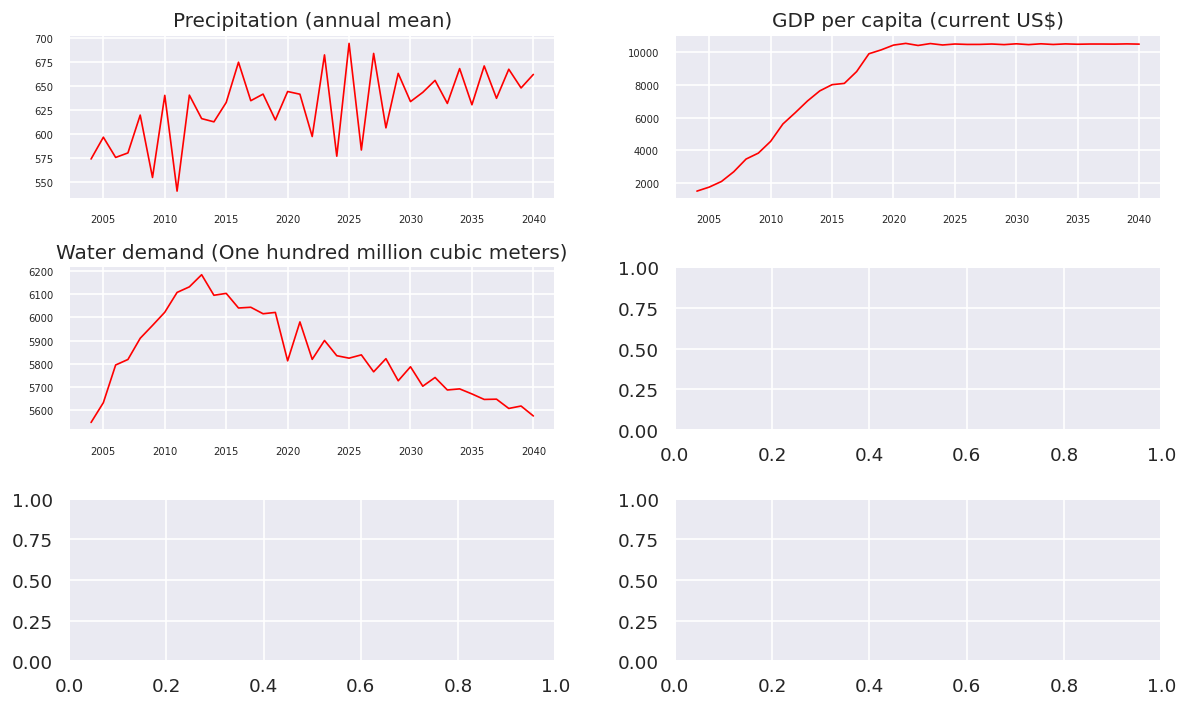

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i == 3:
      break
    data = tfinal[tfinal.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(tfinal.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

- Temp.
- GDP per capita
- Rainfall index (or any prccipitation)
- pop. density
- water stress